In [1]:
import pandas as pd
file_path = 'ad_click_dataset.csv'
df = pd.read_csv(file_path)

df.head()



,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB
None


In [3]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


DATA CLEANING AND PREPROCESSING

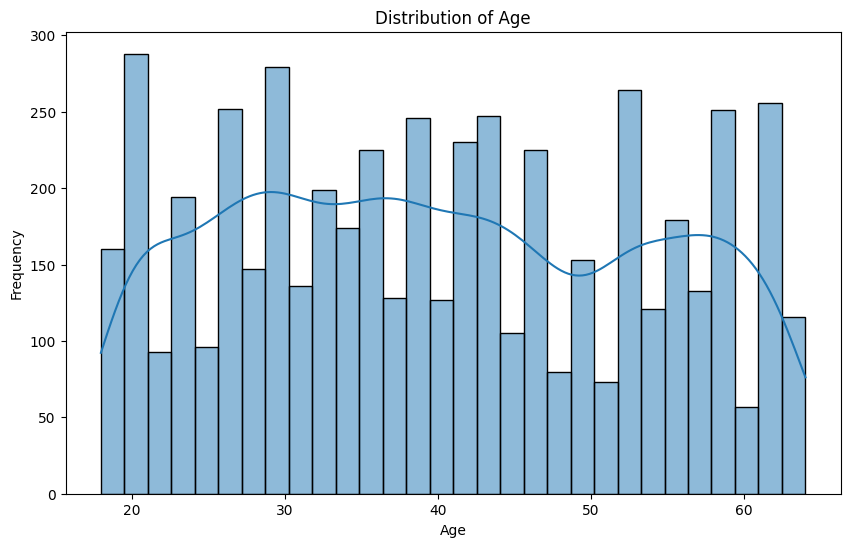

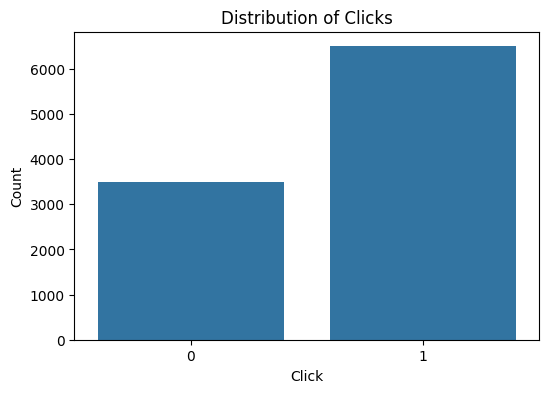

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Numerical Features
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='click', data=df)
plt.title('Distribution of Clicks')
plt.xlabel('Click')
plt.ylabel('Count')
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='mean')
df['age'] = age_imputer.fit_transform(df[['age']])


categorical_columns = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

print(df.isnull().sum())
print(df.head())


id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64
     id full_name        age      gender device_type ad_position  \
0   670   User670  22.000000      Female     Desktop         Top   
1  3044  User3044  40.197363        Male     Desktop         Top   
2  5912  User5912  41.000000  Non-Binary     Desktop        Side   
3  5418  User5418  34.000000        Male     Desktop      Bottom   
4  9452  User9452  39.000000  Non-Binary     Desktop      Bottom   

  browsing_history time_of_day  click  
0         Shopping   Afternoon      1  
1    Entertainment     Morning      1  
2        Education       Night      1  
3    Entertainment     Evening      1  
4     Social Media     Morning      0  


In [6]:
print(df.isnull().sum())


id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['click'])  # Features
y = df['click']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:

X_train_full = pd.concat([X_train, y_train], axis=1)
X_test_full = pd.concat([X_test, y_test], axis=1)

# Save to CSV files
X_train_full.to_csv('training_data.csv', index=False)
X_test_full.to_csv('testing_data.csv', index=False)


In [9]:
X_train.drop(["full_name", "id"], inplace=True, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_24512\1366023482.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


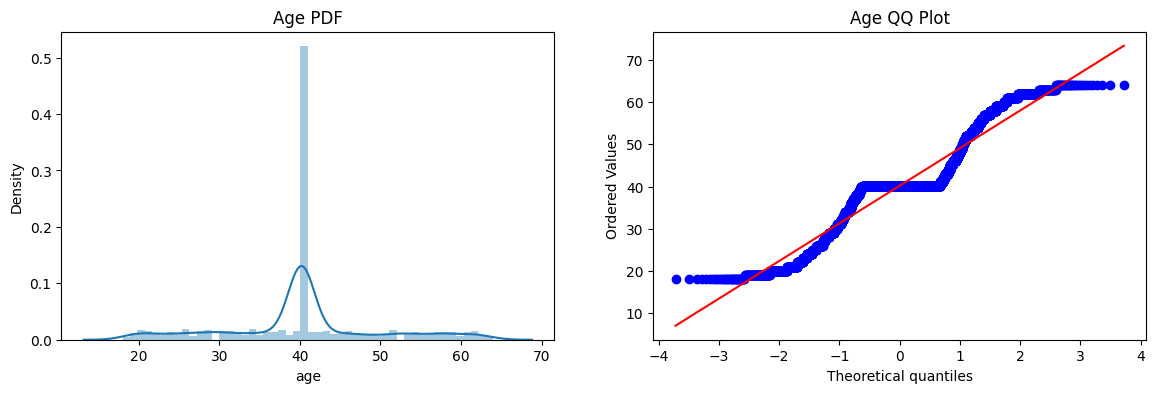

In [10]:
import scipy.stats as stats

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
import numpy as np


transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder( sparse_output=False),["gender", "device_type", "ad_position", "browsing_history", "time_of_day"]),
    #  ('tnf2',FunctionTransformer(func= lambda x:x**6), ["age"]),
    #  ("pt", PowerTransformer(method="yeo-johnson"),["age"])
   
],remainder='passthrough')

In [12]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', OneHotEncoder(sparse_output=False),
                                 ['gender', 'device_type', 'ad_position',
                                  'browsing_history', 'time_of_day'])])

In [13]:
X_train_transform =  transformer.transform(X_train)
X_test_transform =transformer.transform(X_test)

In [14]:
ohe_feature_names = transformer.named_transformers_['tnf1'].get_feature_names_out(
    ["gender", "device_type", "ad_position", "browsing_history", "time_of_day"]
)

remainder_column_names = ["age"]
all_feature_names = list(ohe_feature_names) + list(remainder_column_names)

In [15]:
X_train_transformed = pd.DataFrame(X_train_transform, columns=all_feature_names)
X_test_transformed = pd.DataFrame(X_test_transform, columns=all_feature_names)

In [16]:
y_train.sample(10)

5194    1
7973    0
5666    1
8669    1
3390    1
9844    0
884     1
9955    1
3461    0
4528    0
Name: click, dtype: int64

In [17]:
X_train_transformed.describe()

,gender_Female,gender_Male,gender_Non-Binary,device_type_Desktop,device_type_Mobile,device_type_Tablet,ad_position_Bottom,ad_position_Side,ad_position_Top,browsing_history_Education,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,age
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.654143,0.175714,0.170143,0.479571,0.263143,0.257286,0.483143,0.256857,0.260000,0.104571,0.599571,0.095714,0.096000,0.104143,0.200429,0.201571,0.411429,0.186571,40.193110
std,0.475681,0.380604,0.375785,0.499618,0.440371,0.437169,0.499751,0.436931,0.438666,0.306022,0.490020,0.294220,0.294612,0.305468,0.400350,0.401202,0.492128,0.389595,9.447053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.197363
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,41.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000


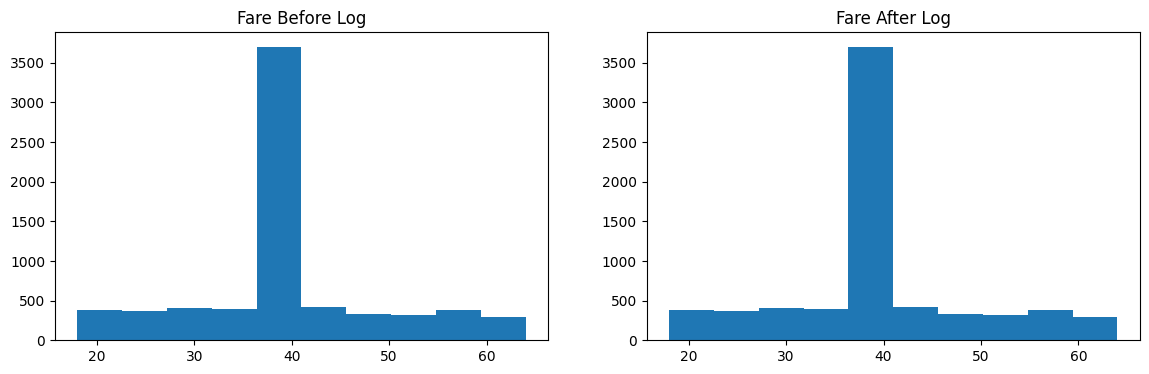

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.hist(X_train['age'])
plt.title('Fare Before Log')

plt.subplot(122)
plt.hist(X_train_transformed['age'])
plt.title('Fare After Log')

plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)

In [20]:
clf.fit(X_train_transformed,y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred1 = clf.predict(X_test_transformed)

In [22]:
from sklearn. metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test,y_pred1))

,0,1
0,4,1051
1,9,1936


In [23]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

print("accuracy =" , accuracy_score(y_test, y_pred1))
print("precision =" , precision_score(y_test, y_pred1))
print("recall_score =" , recall_score(y_test, y_pred1))
print("f1_sce =" , f1_score(y_test, y_pred1))

accuracy = 0.6466666666666666
precision = 0.6481419484432541
recall_score = 0.9953727506426735
f1_sce = 0.7850770478507705


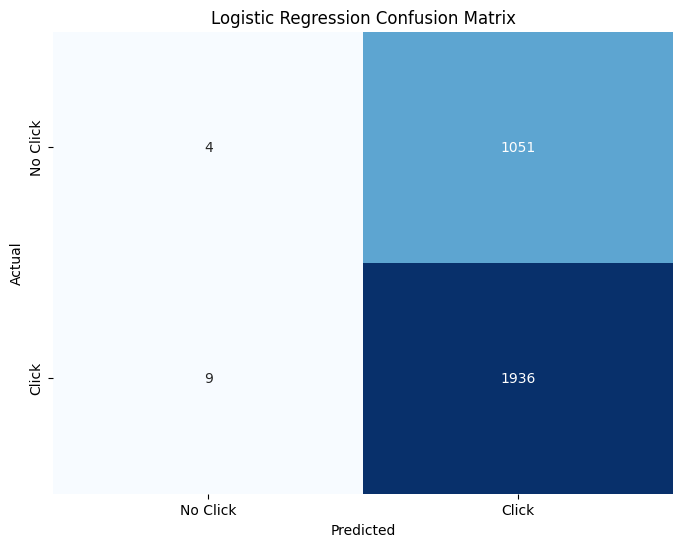

In [24]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred1, 'Logistic Regression Confusion Matrix')

In [25]:
!pip3 install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from xgboost import XGBClassifier

classifier = XGBClassifier(
    n_estimators=300,         # Number of trees (boosting rounds)
    learning_rate=0.3,        # Step size shrinkage
    max_depth=6,              # Maximum depth of the tree
    subsample=0.8,            # Fraction of samples to be used for fitting the individual base learners
    colsample_bytree=0.8,     # Fraction of features to be used for fitting the individual base learners
    scale_pos_weight=1,       # Controls the balance of positive and negative weights for imbalanced classes
    random_state=42,          # Seed for reproducibility
    objective="binary:logistic"  # Binary classification objective
   )


classifier.fit(X_train_transformed, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [27]:
y_pred2 = classifier.predict(X_test_transformed)

In [28]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)

In [29]:
pd.DataFrame(cm2)

,0,1
0,492,563
1,199,1746


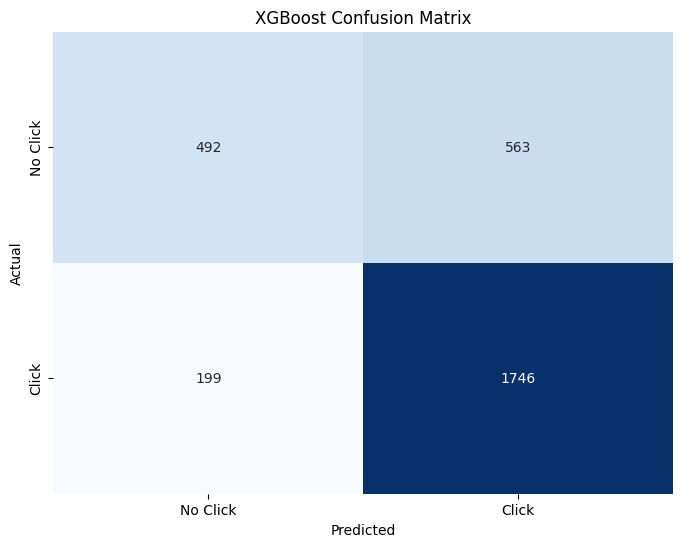

In [30]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred2, title):
    cm2 = confusion_matrix(y_true, y_pred2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred2, 'XGBoost Confusion Matrix')

In [31]:
print("accuracy =" , accuracy_score(y_test, y_pred2))
print("precision =" , precision_score(y_test, y_pred2))
print("recall_score =" , recall_score(y_test, y_pred2))
print("f1_sce =" , f1_score(y_test, y_pred2))

accuracy = 0.746
precision = 0.7561715028150715
recall_score = 0.8976863753213368
f1_sce = 0.8208744710860366


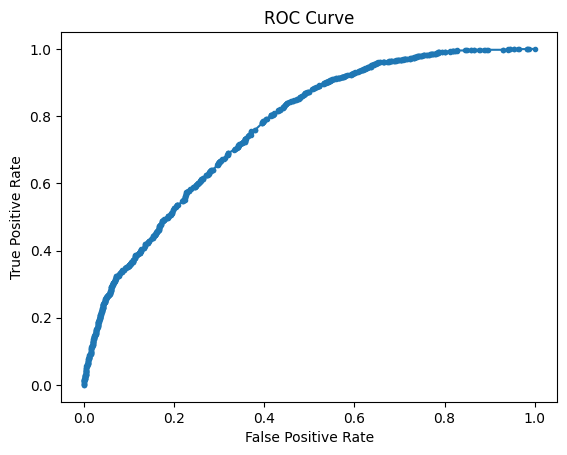

AUC Score: 0.7652


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming your model outputs probabilities (you can get them using `predict_proba` method)
xgboost_probs = classifier.predict_proba(X_test_transformed)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgboost_probs)

# Plot ROC curve
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC score
auc = roc_auc_score(y_test, xgboost_probs)
print(f"AUC Score: {auc:.4f}")


In [33]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['XGBoost Prediction'] = y_pred2

In [34]:
result.sample(10)

,Actual Label,Logistic Regression Prediction,XGBoost Prediction
5529,1,1,0
4127,0,1,1
9783,1,1,1
932,0,1,0
8933,1,1,0
7259,0,1,1
3487,0,1,0
9239,1,1,0
5635,1,1,1
427,1,1,0


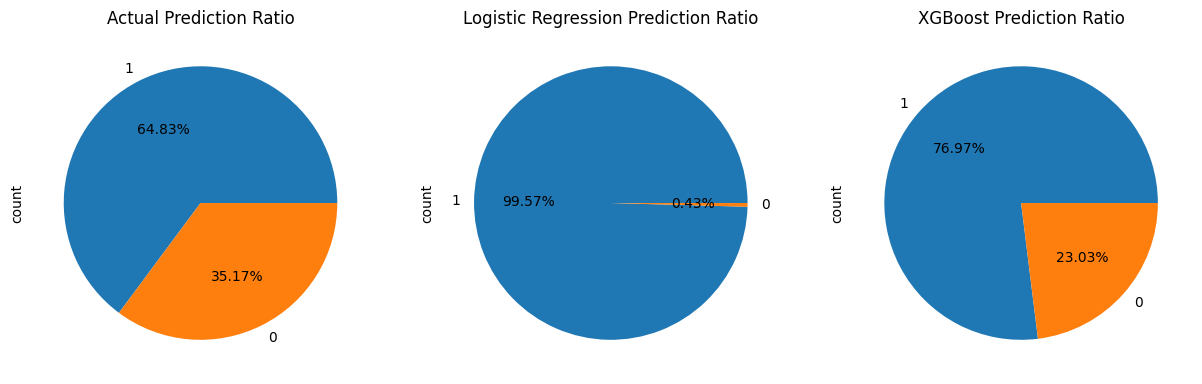

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

ax1.set_title('Actual Prediction Ratio')
result['Actual Label'].value_counts().plot(kind='pie',autopct='%.2f%%', ax=ax1)

ax2.set_title('Logistic Regression Prediction Ratio')
result['Logistic Regression Prediction'].value_counts().plot(kind='pie',autopct='%.2f%%', ax=ax2)

ax3.set_title("XGBoost Prediction Ratio")
result['XGBoost Prediction'].value_counts().plot(kind='pie',autopct='%.2f%%', ax=ax3)

plt.show()